# EDA of the diamonds data

It is good practice to have a look at new data before you go to work with it.  
In other words, we should do an Explainatory Data Analysis.  
Below you find an example of such an EDA.  

Note that there will be additional examples of what is possible with ggplot.  
The details of these plots will not be explaind here, here we will just look at the plots.

## setup notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

## get the data

In [3]:
diamonds = pd.read_csv('./dat/diamonds.csv')

Lets have a look at the diamond data

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#print(type(diamonds))   # uncomment to see that diamonds is a dataframe
#print(diamonds.dtypes)  # uncomment to see the column dtypes
#print(diamonds.columns) # uncomment to see a list with column names
#print(diamonds.shape)   # the nr of rows and colulmns of the dataframe
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
#-- check for null values -----
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Each of the 53940 rows in the dataframe describes a diamond.  
Note there are no null values. 

## data dictionary
- carat----- weight of the diamond (0.2--5.01)
- cut ------ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color ---- diamond colour, from J (worst) to D (best)
- clarity -- a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- table ---- width of top of diamond relative to widest point (43--95)
- depth ---- total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- price ---- price in US dollars (\$326--\$18,823)
- x -------- length in mm (0--10.74)
- y -------- width in mm (0--58.9)
- z -------- depth in mm (0--31.8)   
[source](http://ggplot2.tidyverse.org/reference/diamonds.html)

## select columns

We will use only the columns: carat, cut, color and price.  

In [7]:
dat = diamonds[['carat','cut','color','price']]
dat.head()

,carat,cut,color,price
0,0.23,Ideal,E,326
1,0.21,Premium,E,326
2,0.23,Good,E,327
3,0.29,Premium,I,334
4,0.31,Good,J,335


# 1 - carat

Carat is an unit of weight for precious stones and pearls, equivalent to 200 milligrams.  
So carat is a ratio variable.

Lets have a look at this column.  
This column has numeric values, so we can compute the standard descriptive statistics:  
(mean, standaard deviation, minimum value, Q1, median, Q3 and the maximum value)

In [8]:
dat['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Lets count how many null values carat has

In [9]:
dat['carat'].isnull().sum()

0

Lets have a look how the values are distributed

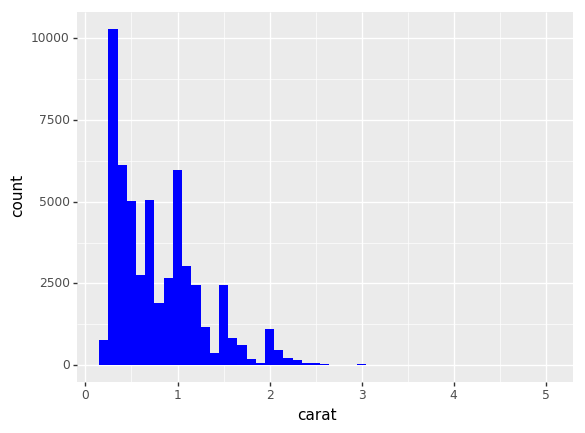

<ggplot: (-9223372036840588551)>


In [10]:
fig = ggplot(aes(x='carat'), data= dat) + geom_histogram(fill='blue', binwidth=0.1)
print(fig)

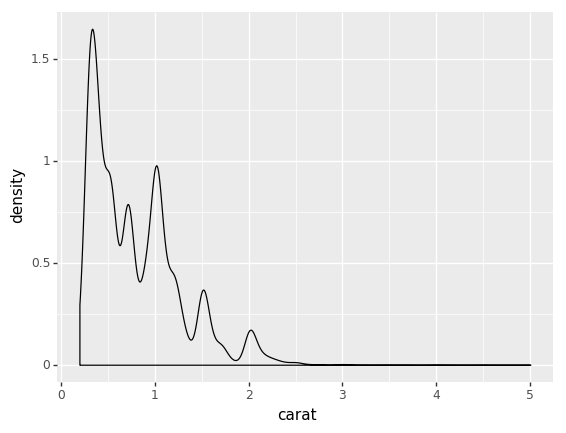

<ggplot: (14359949)>


In [11]:
fig = ggplot(aes(x='carat'), data= dat) + geom_density()
print(fig)

the value distrubution is very irregular, there are more than 5 peaks in the distribution

We can use a boxplot to check if there are outliers

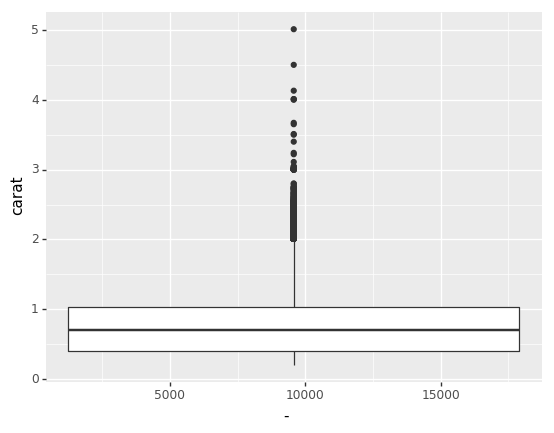

<ggplot: (-9223372036840294298)>

In [12]:
ggplot(aes(x='price',y='carat'), data= dat) + geom_boxplot() + xlab('-')

There apear to be some outlieres above 3 carats (about 10 of the 50,000+ diamonds)

# 2 -  cut
Cut is an ordinal variable with 5 levels, lets have a look at the levels

In [13]:
dat['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

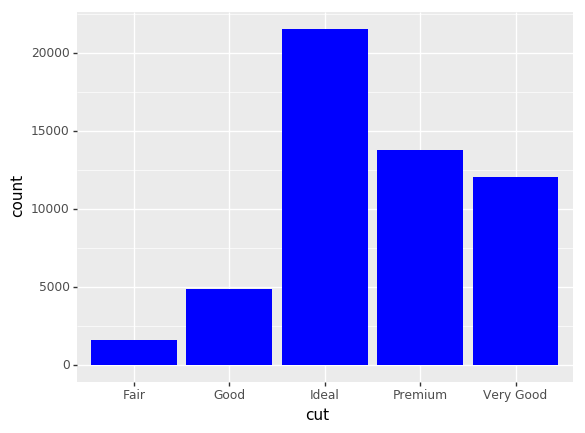

<ggplot: (-9223372036840290090)>

In [14]:
ggplot(aes(x='cut'), data=dat) + geom_bar(fill='blue')

The description gives the number of levels (unique values of cut), the modus, and the frequency of the modus.  
Note that the median is defined for ordinal variables, it is not shown (Python considers cut to be nominal)

In [15]:
dat['cut'].describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

# 3 - color

Color is a nominal variable with 7 levels

In [16]:
dat['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

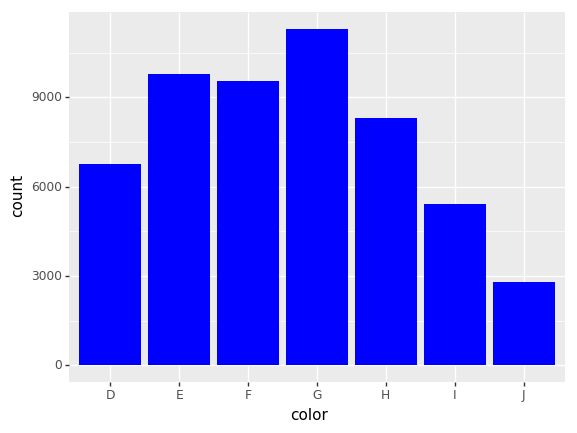

<ggplot: (-9223372036840281172)>

In [17]:
ggplot(aes(x='color'), data=dat) + geom_bar(fill='blue')

In [18]:
dat['color'].describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

# 4 -  price

Price is the value of the diamond in US$ (of which year?)  
So price can be considered a ratio variable.

In [19]:
dat['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [20]:
dat['price'].isnull().sum() # check for null values

0

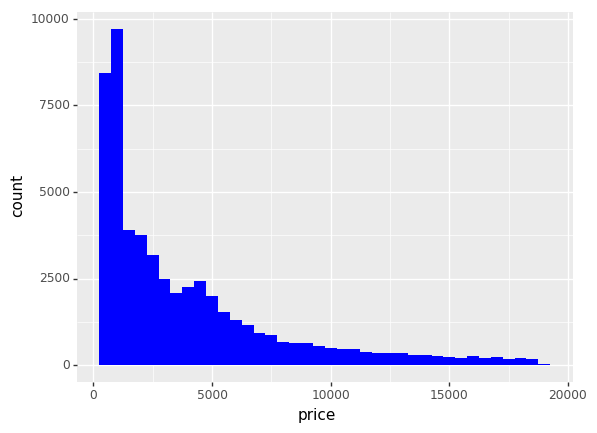

<ggplot: (14613680)>

In [21]:
ggplot(aes(x='price'), data= dat) + geom_histogram(fill='blue', binwidth=500)

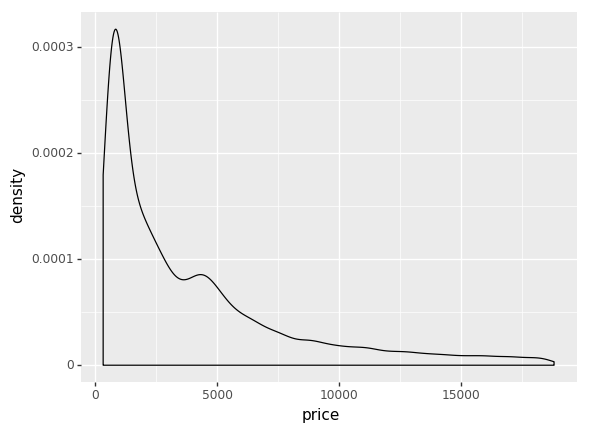

<ggplot: (14613540)>


In [22]:
fig = ggplot(aes(x='price'), data= dat) + geom_density()
print(fig)

# 5 - Interactions between variables

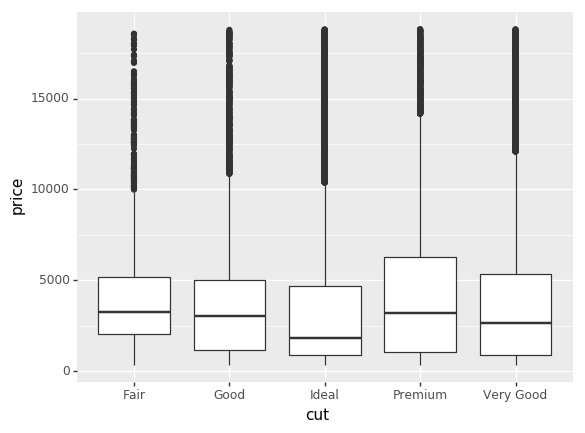

<ggplot: (14680412)>

In [23]:
ggplot(aes(x='cut',y='price'), data= dat) + geom_boxplot() 

There is no obvious relation between cut and price.

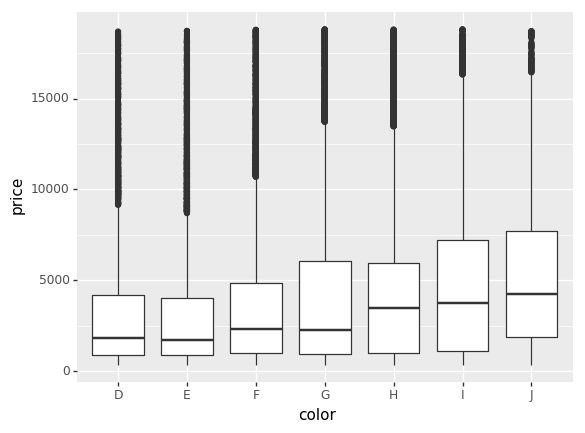

<ggplot: (-9223372036838798206)>

In [ ]:
ggplot(aes(x='color',y='price'), data= dat) + geom_boxplot() 

In [ ]:
ggplot(aes(x='carat',y='price'), data= dat) + geom_point() 

The above examples show how 2 variables interact.  
Using the facet_grid we can show how 3 variables interact. 

In [ ]:
ggplot(diamonds, aes(x='price')) + \
    geom_histogram() + \
    facet_grid("cut~color")

===============end of EDA ========================================================

# produce a data set for our demonstrations

## select rows/cases

Dat has data for over 50000 diamonds, that is far more than needed for our ggplot demonstrations.   
To speed things up and to make scatterplats more readable we will select at random 500 diamonds.   
(see the documentation [df.sample](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sample.html) on how to do that)  
The selected diamonds will be written to a dataframe dia.   
In our examples we will work with the dataframe dia.

In [ ]:
dia = dat.sample(n=500, random_state=123456 )
print(dia.shape)
dia = dia[['carat','cut','color','price']]
dia.head()

Note that the first column shows the original row numbers.

write the selected data to a csv file  
(uncomment the line below to do that)

In [ ]:
#dia.to_csv('./dat/dia.csv', index=False)